# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

Using pertpy as workaround for sccoda installation because of issues with conda environment and scanpy

In [1]:
import scanpy as sc

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pertpy as pt

/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
from matplotlib import cm, rcParams

In [8]:
from scipy.stats import wilcoxon

In [10]:
#import warnings
#import numpy as np
#import pandas as pd 
#import scanpy as sc
#import matplotlib.pyplot as plt
#import matplotlib
#import seaborn as sns

In [11]:
#import importlib
#import warnings
#warnings.filterwarnings("ignore")
#import pandas as pd
#import pickle as pkl
#import matplotlib.pyplot as plt

In [12]:
#import seaborn as sns
#import matplotlib.pyplot as plt

In [13]:
#from statannotations.Annotator import Annotator

In [14]:
#from scipy.stats import wilcoxon

In [9]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/pseudobulk/"
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/012_LUAD/figures/"
input_path = f"{path}paired_adata_clean_luad.h5ad"

In [10]:
adata = sc.read_h5ad(input_path) 

In [11]:
adata

AnnData object with n_obs × n_vars = 350066 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [12]:
# Create a Boolean mask for the cells that you want to keep
mask = ~((adata.obs['origin'] == 'normal_adjacent') & (adata.obs['cell_type'] == 'malignant cell'))

# Subset the adata object using the mask to exclude the specific cells
adata = adata[mask].copy()

# Now `adata_filtered` contains all cells except those with origin == 'normal_adjacent' and cell_type == 'malignant cell'


In [13]:
adata.obs.groupby(["cell_type","origin"]).count()

/tmp/ipykernel_3705910/1765337969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["cell_type","origin"]).count()


sample  uicc_stage  ever_smoker    age  \
cell_type         origin                                                    
epithelial cell   normal_adjacent    4957        4957         4957   4154   
                  tumor_primary     16082       16082        16082  14086   
macrophage        normal_adjacent   65453       65453        65453  55380   
                  tumor_primary     38818       38818        38818  34161   
B cell            normal_adjacent    2888        2888         2888   2647   
                  tumor_primary     13965       13965        13965  11739   
dendritic cell    normal_adjacent     348         348          348    294   
                  tumor_primary       579         579          579    475   
CD4+ T cell       normal_adjacent   45654       45654        45654  41979   
                  tumor_primary     48849       48849        48849  42106   
CD8+ T cell       normal_adjacent   31378       31378        31378  26211   
                  tumor_primary     41225       41225        41225  34668   
neutrophil        normal_adjacent    4155        4155         4155   4155   
                  tumor_primary      1991        1991         1991   1991   
regulatory T cell normal_adjacent    2876        2876         2876   2641   
                  tumor_primary     13909       13909        13909  11685   
malignant cell    normal_adjacent       0           0            0      0   
                  tumor_primary     16365       16365        16365  14014   

                                   donor_id  dataset  ann_fine  \
cell_type         origin                                         
epithelial cell   normal_adjacent      4957     4957      4957   
                  tumor_primary       16082    16082     16082   
macrophage        normal_adjacent     65453    65453     65453   
                  tumor_primary       38818    38818     38818   
B cell            normal_adjacent      2888     2888      2888   
                  tumor_primary       13965    13965     13965   
dendritic cell    normal_adjacent       348      348       348   
                  tumor_primary         579      579       579   
CD4+ T cell       normal_adjacent     45654    45654     45654   
                  tumor_primary       48849    48849     48849   
CD8+ T cell       normal_adjacent     31378    31378     31378   
                  tumor_primary       41225    41225     41225   
neutrophil        normal_adjacent      4155     4155      4155   
                  tumor_primary        1991     1991      1991   
regulatory T cell normal_adjacent      2876     2876      2876   
                  tumor_primary       13909    13909     13909   
malignant cell    normal_adjacent         0        0         0   
                  tumor_primary       16365    16365     16365   

                                   cell_type_predicted  doublet_status  \
cell_type         origin                                                 
epithelial cell   normal_adjacent                 3518            4957   
                  tumor_primary                  12703           16081   
macrophage        normal_adjacent                35190           65453   
                  tumor_primary                  19292           38816   
B cell            normal_adjacent                  732            2888   
                  tumor_primary                   5010           13965   
dendritic cell    normal_adjacent                  131             348   
                  tumor_primary                    337             579   
CD4+ T cell       normal_adjacent                12440           45089   
                  tumor_primary                  18130           47398   
CD8+ T cell       normal_adjacent                12007           30513   
                  tumor_primary                  20485           39878   
neutrophil        normal_adjacent                  556            4155   
                  tumor_primary                    188         

## SCCODA

In [14]:
adata.obs

,sample,uicc_stage,ever_smoker,age,donor_id,origin,dataset,ann_fine,cell_type_predicted,doublet_status,...,sex_ontology_term_id,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCTGAGATATGCA.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGAGCACCGTC.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGGTCGTCTTC.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACCTGGTGTCGCTG.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
AAACGGGAGGTGCTTT.7.NEC-2,Goveia_Carmeliet_2020_patient_45_normal_adjacent,II,yes,73.0,Goveia_Carmeliet_2020_patient_45,normal_adjacent,Goveia_Carmeliet_2020,Macrophage alveolar,Macrophage,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,73-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAGCCTTGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,T cell CD4,NaN,singlet,...,PATO:0000383,UBERON:0002048,CD4+ T cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCACAGGTCGTC-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,T cell CD4,NaN,singlet,...,PATO:0000383,UBERON:0002048,CD4+ T cell,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCACATCTATGG-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage
TTTGTCAGTGTTGGGA-1-38-8,Leader_Merad_2021_414,II,no,64.0,Leader_Merad_2021_729,tumor_primary,Leader_Merad_2021_10x_3p_v2_beads,Macrophage,NaN,singlet,...,PATO:0000383,UBERON:0002048,macrophage,10x 3' v2,lung adenocarcinoma,Homo sapiens,female,lung,unknown,64-year-old human stage


In [15]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["origin","dataset","disease","sex","donor_id"],
)
print(sccoda_data)
print(sccoda_data["coda"].X)
print(sccoda_data["coda"].obs)

MuData object with n_obs × n_vars = 349668 × 17820
  2 modalities
    rna:	349492 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/kvalem/.conda/envs/pertpy_24/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [16]:
# Select control and salmonella data
sccoda_data.mod["coda_tumor_normal"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["normal_adjacent", "tumor_primary"])
].copy()
print(sccoda_data["coda_tumor_normal"])

AnnData object with n_obs × n_vars = 176 × 9
    obs: 'donor_id', 'sex', 'sample', 'disease', 'dataset', 'origin'
    var: 'n_cells'


In [18]:
sccoda_data

MuData object with n_obs × n_vars = 349668 × 17820
  3 modalities
    rna:	349492 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	176 x 9
      obs:	'donor_id', 'sex', 'sample', 'disease', 'dataset', 'origin'
      var:	'n_cells'
    coda_tumor_normal:	176 x 9
      obs:	'donor_id', 'sex', 'sample', 'disease', 'dataset', 'origin'
      var:	'n_cells'

In [19]:
#plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

In [20]:
#significance_level = 0.05  
#
#cell_types = plot_df['Cell type'].unique()
#
#
#for cell_type in cell_types:
#    male_fractions = plot_df[(plot_df['cell_type'] == cell_type) & (plot_df['sex'] == 'male')]['fraction'].dropna()
#    female_fractions = plot_df[(plot_df['cell_type'] == cell_type) & (plot_df['sex'] == 'female')]['fraction'].dropna()
#
#    # Ensure the lengths are equal by truncating the longer list
#    min_length = min(len(male_fractions), len(female_fractions))
#    male_fractions = male_fractions[:min_length]
#    female_fractions = female_fractions[:min_length]
#    
#    # Perform wilcoxon Test
#    stat, p_value = wilcoxon(male_fractions, female_fractions)
#        
#    if p_value < significance_level:
#        x_position = list(cell_types).index(cell_type)
#        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
#        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)


In [21]:
sccoda_data["coda_tumor_normal"].obs["origin_sex"] = sccoda_data["coda_tumor_normal"].obs["origin"].astype(str) + "_" + sccoda_data["coda_tumor_normal"].obs["sex"].astype(str)

In [22]:
#sccoda_data["coda_tumor_normal"]

In [31]:
sccoda_data["coda_tumor_normal"]

AnnData object with n_obs × n_vars = 176 × 9
    obs: 'donor_id', 'sex', 'sample', 'disease', 'dataset', 'origin', 'origin_sex'
    var: 'n_cells'

In [37]:
sccoda_data["coda_tumor_normal"].obs.origin

scCODA_sample_id
Goveia_Carmeliet_2020_patient_45_normal_adjacent    normal_adjacent
Goveia_Carmeliet_2020_patient_45_tumor_primary        tumor_primary
Goveia_Carmeliet_2020_patient_46_normal_adjacent    normal_adjacent
Goveia_Carmeliet_2020_patient_46_tumor_primary        tumor_primary
Goveia_Carmeliet_2020_patient_50_normal_adjacent    normal_adjacent
                                                         ...       
UKIM-V-2_P9_tumor_primary                             tumor_primary
UKIM-V_P1_normal_adjacent                           normal_adjacent
UKIM-V_P1_tumor_primary                               tumor_primary
UKIM-V_P3_normal_adjacent                           normal_adjacent
UKIM-V_P3_tumor_primary                               tumor_primary
Name: origin, Length: 176, dtype: category
Categories (2, object): ['normal_adjacent', 'tumor_primary']

In [23]:
#plot_df

/tmp/ipykernel_3705910/608489554.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


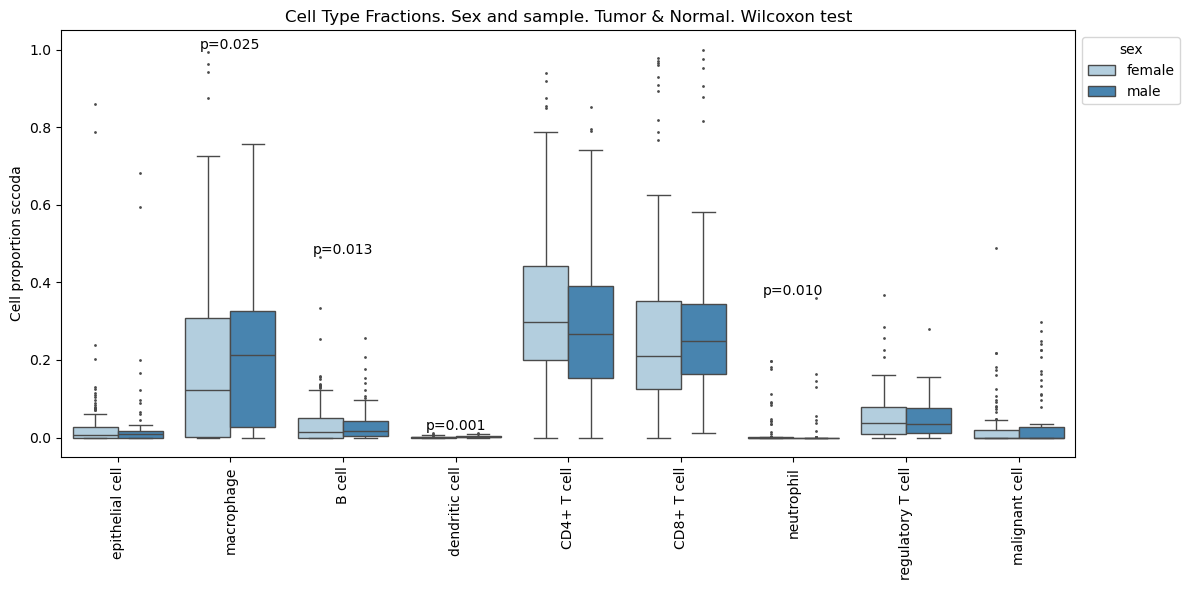

In [24]:
data =sccoda_data["coda_tumor_normal"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "sex"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'male')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'female')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test')
plt.tight_layout()


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

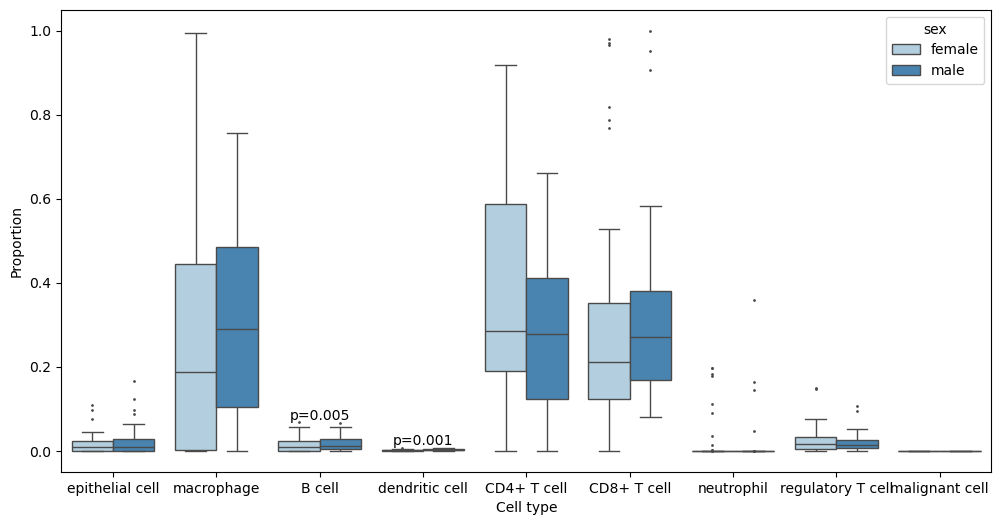

In [46]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["origin"]=="normal_adjacent"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "sex"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'male')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['sex'] == 'female')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Sex and sample. Normal. Wilcoxon test')
plt.tight_layout()


/tmp/ipykernel_3704038/2701346773.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


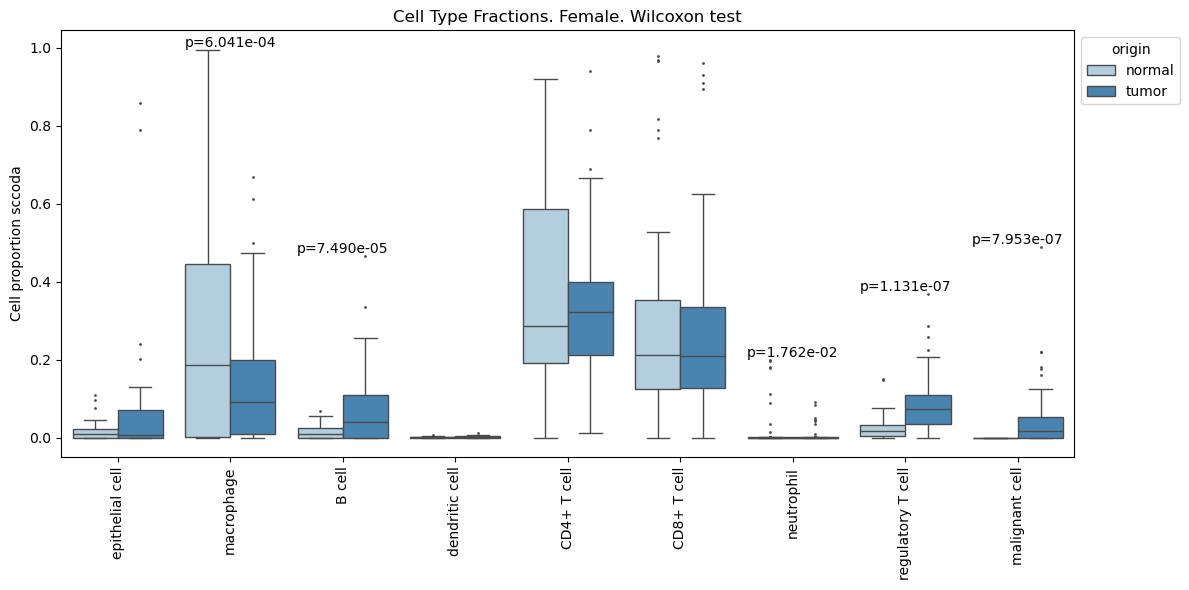

In [30]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["sex"]=="female"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "origin"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'tumor')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'normal')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Female. Wilcoxon test')
plt.tight_layout()


/tmp/ipykernel_3704038/1763599923.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


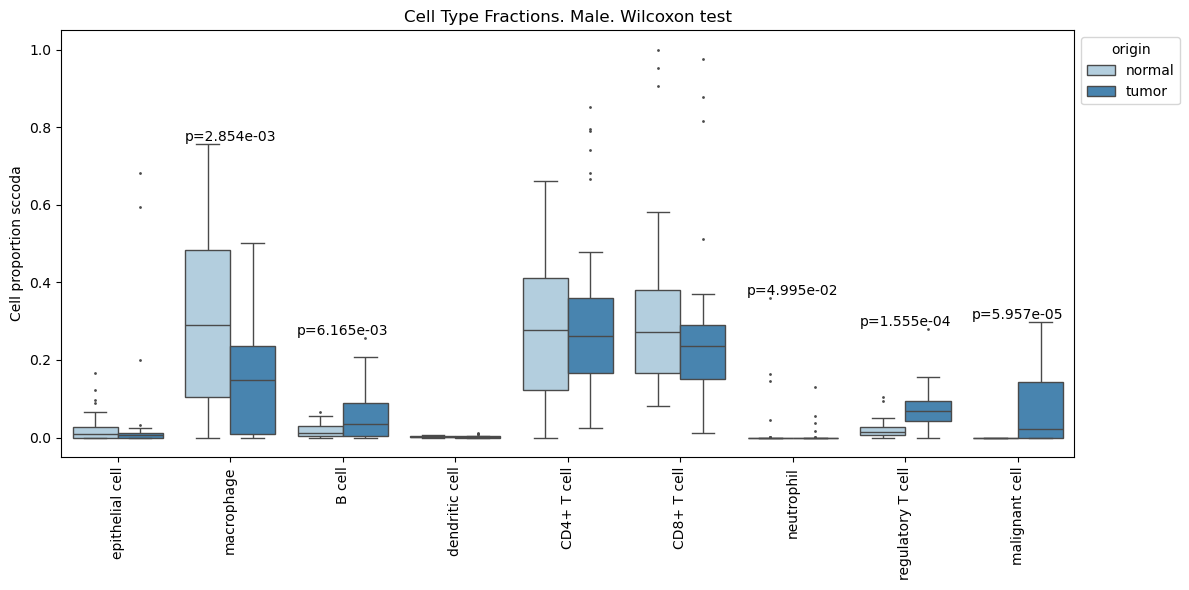

In [31]:
data =sccoda_data["coda_tumor_normal"][sccoda_data["coda_tumor_normal"].obs["sex"]=="male"]
feature_name = "origin_sex"
y_scale= "relative"
plot_facets= False
add_dots= False
args_boxplot = {}
args_swarmplot = {}
figsize= None
dpi = 100
cmap= "Blues"
plot_legend = True
level_order= None

# y scale transformations
if y_scale == "relative":
    sample_sums = np.sum(data.X, axis=1, keepdims=True)
    X = data.X/sample_sums
    value_name = "Proportion"
# add pseudocount 1 if using log scale (needs to be improved)
elif y_scale == "log":
    X = np.log(data.X + 1)
    value_name = "log(count)"
elif y_scale == "count":
    X = data.X
    value_name = "count"
else:
    raise ValueError("Invalid y_scale transformation")

count_df = pd.DataFrame(X, columns=data.var.index, index=data.obs.index).\
    merge(data.obs[feature_name], left_index=True, right_index=True)
plot_df = pd.melt(count_df, id_vars=feature_name, var_name="Cell type", value_name=value_name)

plot_df['origin'] = plot_df['origin_sex'].str.split('_', n=2).str[0]  
plot_df['sex'] = plot_df['origin_sex'].str.split('_', n=2).str[2] 

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()

plot_df = plot_df[plot_df["Cell type"].isin(cell_types)]

if level_order:
            args_boxplot["hue_order"] = level_order
            args_swarmplot["hue_order"] = level_order

    
fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)
feature_name = "origin"
sns.boxplot(x="Cell type", y=value_name, hue=feature_name, data=plot_df, fliersize=1,
            palette=cmap, ax=ax, **args_boxplot)

if add_dots:
    sns.swarmplot(
        x="Cell type",
        y=value_name,
        data=plot_df,
        hue=feature_name,
        ax=ax,
        dodge=True,
        color="black",
        **args_swarmplot
    )

significance_level = 0.05  

cell_types = plot_df['Cell type'].unique()


for cell_type in cell_types:
    male_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'tumor')]['Proportion'].dropna()
    female_fractions = plot_df[(plot_df['Cell type'] == cell_type) & (plot_df['origin'] == 'normal')]['Proportion'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = plot_df[plot_df['Cell type'] == cell_type]['Proportion'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)
        
cell_types = pd.unique(plot_df["Cell type"])
ax.set_xticklabels(cell_types, rotation=90)

if plot_legend:
    handles, labels = ax.get_legend_handles_labels()
    handout = []
    labelout = []
    for h, l in zip(handles, labels):
        if l not in labelout:
            labelout.append(l)
            handout.append(h)
    ax.legend(handout, labelout, loc='upper left', bbox_to_anchor=(1, 1), ncol=1, title=feature_name)
    
# Customize the plot
plt.xlabel('')
plt.ylabel('Cell proportion sccoda')
plt.title('Cell Type Fractions. Male. Wilcoxon test')
plt.tight_layout()


In [47]:
def stackbar(
        y,
        type_names,
        title,
        level_names,
        figsize=None,
        dpi=100,
        cmap=cm.tab20,
        plot_legend=True,
):
    """
    Plots a stacked barplot for one (discrete) covariate with percentage annotations.
    
    Parameters
    ----------
    y
        The count data, collapsed onto the level of interest.
    type_names
        The names of all cell types.
    title
        Plot title, usually the covariate's name.
    level_names
        Names of the covariate's levels.
    figsize
        Figure size.
    dpi
        DPI setting.
    cmap
        The color map for the barplot.
    plot_legend
        If True, adds a legend.

    Returns
    -------
    ax
        A plot with percentage annotations.
    """
    n_bars, n_types = y.shape
    figsize = rcParams["figure.figsize"] if figsize is None else figsize

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    r = np.array(range(n_bars))
    sample_sums = np.sum(y, axis=1)

    barwidth = 0.85
    cum_bars = np.zeros(n_bars)

    for n in range(n_types):
        bars = [i / j * 100 for i, j in zip([y[k][n] for k in range(n_bars)], sample_sums)]
        plt.bar(r, bars, bottom=cum_bars, color=cmap(n % cmap.N), width=barwidth, label=type_names[n], linewidth=0)

        # Adding text annotations for the percentages
        for i in range(n_bars):
            bar_height = bars[i]
            if bar_height > 0:  # Only annotate if the segment has a positive height
                ax.text(r[i], cum_bars[i] + bar_height / 2, f'{bar_height:.1f}%', ha='center', va='center', fontsize=8)

        cum_bars += bars

    ax.set_title(title)
    if plot_legend:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    ax.set_xticks(r)
    ax.set_xticklabels(level_names, rotation=45)
    ax.set_ylabel("Proportion")

    return ax


In [43]:
def stackbar(
        y,
        type_names,
        title,
        level_names,
        figsize=None,
        dpi= 100,
        cmap = cm.tab20,
        plot_legend= True,
):
    """
    Plots a stacked barplot for one (discrete) covariate
    Typical use (only inside stacked_barplot): plot_one_stackbar(data.X, data.var.index, "xyz", data.obs.index)

    Parameters
    ----------
    y
        The count data, collapsed onto the level of interest. i.e. a binary covariate has two rows, one for each group, containing the count
        mean of each cell type
    type_names
        The names of all cell types
    title
        Plot title, usually the covariate's name
    level_names
        names of the covariate's levels
    figsize
        figure size
    dpi
        dpi setting
    cmap
        The color map for the barplot
    plot_legend
        If True, adds a legend

    Returns
    -------
    Returns a plot

    ax
        a plot

    """
    n_bars, n_types = y.shape

    figsize = rcParams["figure.figsize"] if figsize is None else figsize

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    r = np.array(range(n_bars))
    sample_sums = np.sum(y, axis=1)

    barwidth = 0.85
    cum_bars = np.zeros(n_bars)

    for n in range(n_types):
        bars = [i / j * 100 for i, j in zip([y[k][n] for k in range(n_bars)], sample_sums)]
        plt.bar(r, bars, bottom=cum_bars, color=cmap(n % cmap.N), width=barwidth, label=type_names[n], linewidth=0)
        cum_bars += bars

    ax.set_title(title)
    if plot_legend:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    ax.set_xticks(r)
    ax.set_xticklabels(level_names, rotation=45)
    ax.set_ylabel("Proportion")

    return ax

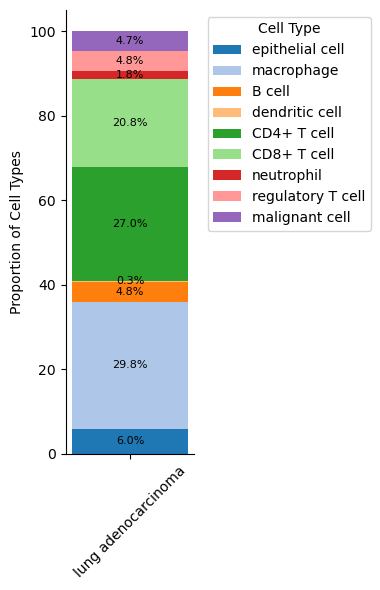

In [54]:
data =sccoda_data["coda_tumor_normal"]
feature_name = "disease"
figsize=(4, 6)
dpi = 100
cmap = cm.tab20
plot_legend = True
level_order = None



# cell type names
type_names = data.var.index

# option to plot one stacked barplot per sample
if feature_name == "samples":
    if level_order:
        assert set(level_order) == set(data.obs.index), "level order is inconsistent with levels"
        data = data[level_order]
    g = stackbar(
        data.X,
        type_names=data.var.index,
        title="samples",
        level_names=data.obs.index,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
else:
    # Order levels
    if level_order:
        assert set(level_order) == set(data.obs[feature_name]), "level order is inconsistent with levels"
        levels = level_order
    elif hasattr(data.obs[feature_name], 'cat'):
        levels = data.obs[feature_name].cat.categories.to_list()
    else:
        levels = pd.unique(data.obs[feature_name])
    n_levels = len(levels)
    feature_totals = np.zeros([n_levels, data.X.shape[1]])

    for level in range(n_levels):
        l_indices = np.where(data.obs[feature_name] == levels[level])
        feature_totals[level] = np.sum(data.X[l_indices], axis=0)

    g = stackbar(
        feature_totals,
        type_names=type_names,
        title=feature_name,
        level_names=levels,
        figsize=figsize,
        dpi=dpi,
        cmap=cmap,
        plot_legend=plot_legend,
        )
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)


    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Proportion of Cell Types')
    plt.title('')
    plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()